![](woman.png)
Fonte: autoria própria, 2023.

**INTRODUÇÃO**

Explorando a interseção entre maternidade e carreira acadêmica no Brasil. Este notebook, parte do curso de Fundamentos de Python e Análise de Dados da Reprograma, utiliza dados do IBGE de 2021 para analisar mulheres, mães e pesquisadoras (mestrandas e doutorandas). Destacando a falta de informações específicas, o projeto ressalta a importância de aprofundar a discussão sobre a maternidade na comunidade acadêmica.

----------------------------------------------------------------------------------------------

**COLETA DOS DADOS**

As bases de dados do IBGE que foram utilizadas são distintas e cada uma fornece informações específicas:
- Dados da população por idada e sexo (ibge_populacao.csv)
- Dados do total de mulheres com 15 anos ou mais por filhos tidos (ibge_maternidade.csv)
- Dados de pessoas com ní­vel de instrução mais elevado por sexo (ibge_educacao.csv)

---------------------------------------------------------------------------------------------------

**PROCESSAMENTO DOS DADOS**

Importando as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Leitura dos arquivos CSV

In [2]:
df_populacao = pd.read_csv('datasets/ibge_populacao.csv', encoding='latin1', delimiter=';')
df_maes = pd.read_csv('datasets/ibge_maternidade.csv', encoding='latin1', delimiter=';')
df_educacao = pd.read_csv('datasets/ibge_educacao.csv', encoding='latin1', delimiter=';')

In [3]:
df_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sexo    2 non-null      object
 1   UF      2 non-null      object
 2   Total   2 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 180.0+ bytes


In [4]:
df_maes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sexo       1 non-null      object
 1   UF         1 non-null      object
 2   Com filho  1 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 156.0+ bytes


In [5]:
df_educacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Sexo                   2 non-null      object
 1   UF                     2 non-null      object
 2   Doutorado              2 non-null      int64 
 3   Mestrado               2 non-null      int64 
 4   Superior de graduacao  2 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 212.0+ bytes


Merge dos dataframes

In [6]:
df_merged = pd.merge(df_populacao, df_maes, on="UF")
df_merged = pd.merge(df_merged, df_educacao, on="UF")

In [7]:
print(df_merged)

     Sexo_x      UF      Total    Sexo_y  Com filho      Sexo  Doutorado  \
0  Mulheres  Brasil  109045840  Mulheres   51416082    Homens     122836   
1  Mulheres  Brasil  109045840  Mulheres   51416082  Mulheres      95885   
2    Homens  Brasil  104271799  Mulheres   51416082    Homens     122836   
3    Homens  Brasil  104271799  Mulheres   51416082  Mulheres      95885   

   Mestrado  Superior de graduacao  
0    277942                5233313  
1    288085                7445696  
2    277942                5233313  
3    288085                7445696  


**VISUALIZAÇÕES**

1. Total Geral de Mulheres no Brasil

IndexError: index 0 is out of bounds for axis 0 with size 0

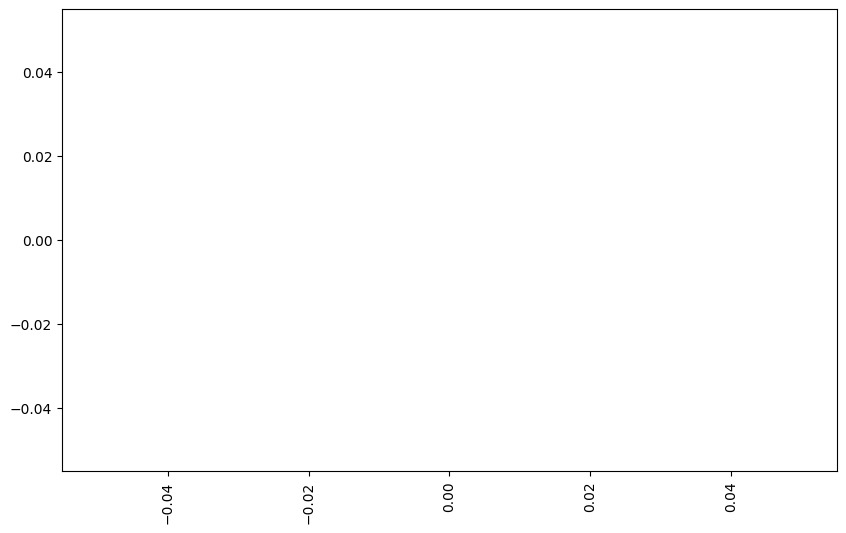

In [10]:
# Filtrar apenas as linhas relevantes e colunas
df_mulheres = df_merged[df_merged['Sexo_x'] == 'Feminino'][['UF', 'Total']]

# Criar um gráfico de barras para o total geral de mulheres
df_mulheres.set_index('UF')['Total'].plot(kind='bar', figsize=(10, 6), color='purple')

plt.xlabel('UF')
plt.ylabel('Total de Mulheres')
plt.title('Total Geral de Mulheres por UF')
plt.show()

2. Total de Mulheres que são Mães

IndexError: index 0 is out of bounds for axis 0 with size 0

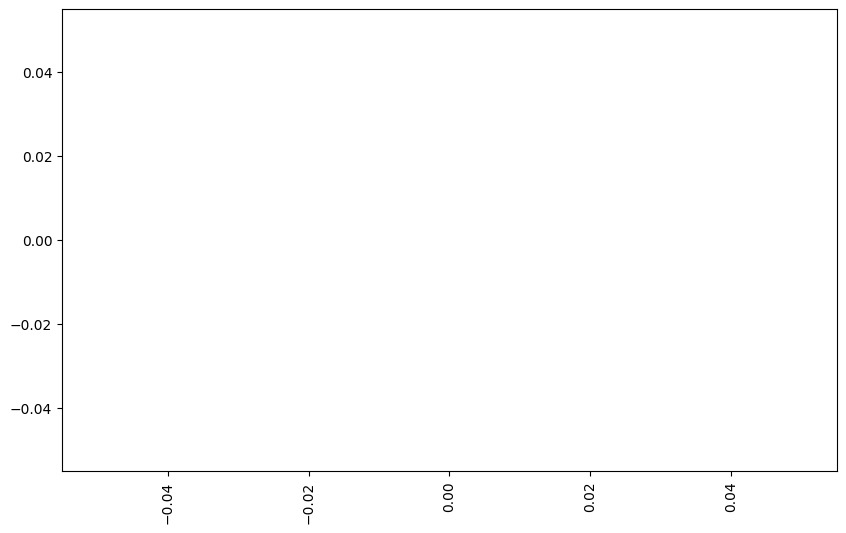

In [11]:
df_maes = df_merged[df_merged['Sexo_x'] == 'Feminino'][['UF', 'Com filho']]

# Criar um gráfico de barras para o total de mulheres que são mães
df_maes.set_index('UF')['Com filho'].plot(kind='bar', figsize=(10, 6), color='green')

plt.xlabel('UF')
plt.ylabel('Total de Mulheres com Filhos')
plt.title('Total de Mulheres que são Mães por UF')
plt.show()

3. Total de Mulheres em Mestrados e Doutorados

IndexError: index 0 is out of bounds for axis 0 with size 0

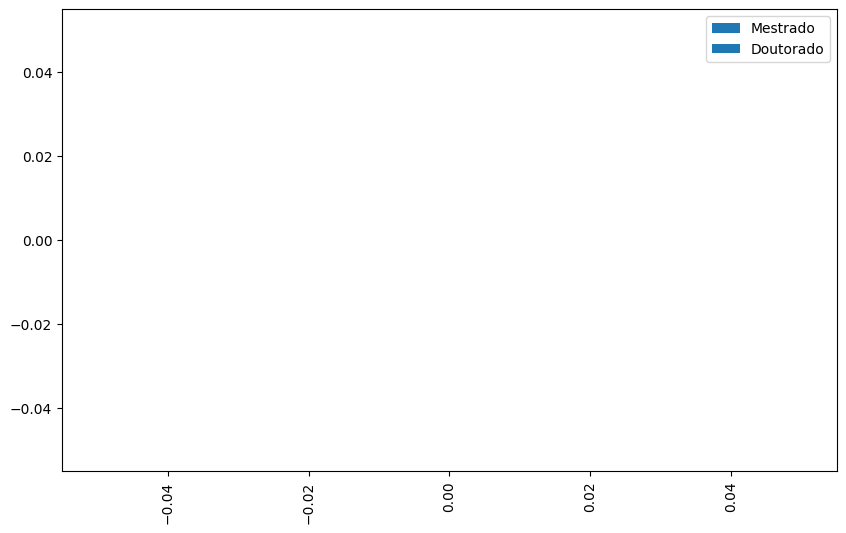

In [12]:
df_pos_graduacao = df_merged[df_merged['Sexo_x'] == 'Feminino'][['UF', 'Mestrado', 'Doutorado']]

# Criar um gráfico de barras empilhadas para o total de mulheres que fazem mestrado e doutorado
df_pos_graduacao.set_index('UF').plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.xlabel('UF')
plt.ylabel('Total de Mulheres')
plt.title('Total de Mulheres que Fazem Mestrado e Doutorado por UF')
plt.show()

**BASE FINAL**

In [ ]:
df_merged.to_csv('base_final.csv', index=False)